In [2]:
from masters.env_wrapper import make_wrapped_env
from masters.networks.mlp import make_mlp
from masters.a2c.trainer import A2CTrainer
from masters.a2c.agent import A2CAgent
from masters.data import cartpole_info
from bindsnet.encoding.encoders import GaussianReceptiveFieldsEncoder
from IPython.display import Image
import torch
from matplotlib import pyplot as plt

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [4]:
encoder = GaussianReceptiveFieldsEncoder(encoding_info=cartpole_info, intensity=200)

In [5]:
actor = make_mlp(
    input_shape=[80],
    output_shape=[10, 2],
    nu=[1e-3, 1e-1],
    norm=0.7,
    time=100,
    dev=True
)
critic = make_mlp(
    input_shape=[80],
    output_shape=[100],
    nu=[1e-3, 1e-1],
    norm=0.7,
    time=100,
    dev=True
)
prev_critic = critic.clone()

In [6]:
agent = A2CAgent(
    actor=actor,
    critic=critic,
    prev_critic=prev_critic,
    encoder=encoder
)

In [7]:
agent.to(device)

In [8]:
trainer = A2CTrainer(
    num_episodes=500,
    spikes_to_value=1,
    lr=0.01
)#, device=device)

In [9]:
# episode = trainer.play_episode(agent, "CartPole-v0", render=True)

In [10]:
# episode.render_replay("out.gif")

In [11]:
# Image("out.gif")

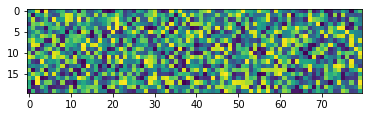

In [12]:
plt.imshow(agent.actor.connections[("In", "Out")].w.cpu().numpy().T)

In [13]:
trainer.fit(agent, "CartPole-v0")

111.0
9.0
9.0
12.0
10.0
28.0
11.0
11.0
14.0
10.0
26.0
9.0
15.0
16.0
10.0
18.0
12.0
15.0
12.0
9.0
30.0
30.0
10.0
12.0
16.0
27.0
34.0
13.0
16.0
10.0
14.0
11.0
9.0
9.0
12.0
24.0
23.0
20.0
9.0
33.0
14.0
14.0
30.0
19.0
9.0
31.0
11.0
13.0
33.0
14.0
36.0
15.0
38.0
21.0
18.0
17.0
19.0
16.0
22.0
51.0
20.0
23.0
16.0
11.0
26.0
23.0
19.0
30.0
15.0
13.0
20.0
12.0
26.0
21.0
14.0
15.0
10.0
10.0
16.0
11.0
19.0
13.0
19.0
19.0
12.0
13.0
16.0
14.0
22.0
13.0
16.0
14.0
11.0
13.0
15.0
13.0
14.0
22.0
19.0
15.0
28.0
10.0
12.0
18.0
14.0
19.0
12.0
13.0
18.0
12.0
11.0
14.0
11.0
12.0
28.0
19.0
14.0
19.0
12.0
16.0
21.0
21.0
14.0
15.0
14.0
10.0
17.0
15.0
14.0
13.0
10.0
10.0
13.0
11.0
15.0
10.0
16.0
16.0
11.0
18.0
16.0
16.0
17.0
18.0
15.0
14.0
15.0
17.0
16.0
16.0
12.0
16.0
11.0
13.0
11.0
17.0
12.0
12.0
12.0
12.0
14.0
14.0
13.0
14.0
12.0
15.0
17.0
14.0
16.0
14.0
14.0
21.0
17.0
11.0
14.0
18.0
10.0
12.0
17.0
16.0
27.0
13.0
17.0
15.0
16.0
15.0
15.0
11.0
17.0
9.0
18.0
18.0
16.0
15.0
20.0
19.0
12.0
10.0
11.0
11.0
14.0
10.

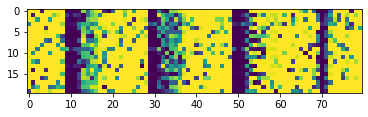

In [14]:
plt.imshow(agent.actor.connections[("In", "Out")].w.numpy().T)

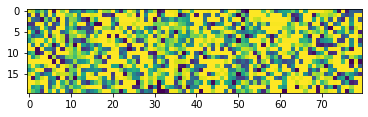

In [56]:
plt.imshow(agent.actor.connections[("In", "Out")].w.numpy().T)

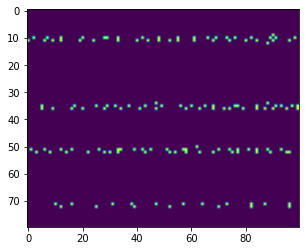

In [18]:
plt.imshow(agent.actor.monitors["In"].get("s").view(100, -1).t())

In [24]:
episode = trainer.play_episode(agent, "CartPole-v0", render=True)

In [25]:
[t.action for t in episode.transitions]

[1, 1, 1, 1, 0, 1, 1, 0, 1]

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

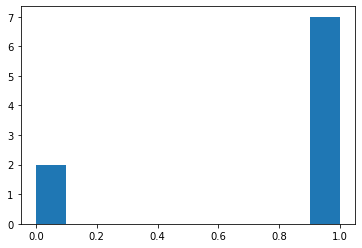

In [26]:
plt.hist([t.action for t in episode.transitions], bins=10)

In [27]:
transition = episode.transitions[-1]

In [28]:
agent.run_actor(
    observation=torch.from_numpy(transition.observation),
)

1

In [29]:
trainer.compute_delta(
    agent,
    observation=torch.from_numpy(transition.observation),
    prev_observation=torch.from_numpy(transition.prev_observation),
    reward=transition.reward,
    done=transition.done
)

-39.0

In [30]:
agent.run_critic(torch.from_numpy(transition.observation))

12.000000476837158

In [31]:
agent.run_prev_critic(torch.from_numpy(transition.prev_observation))

40.0

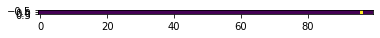

In [54]:
plt.imshow(agent.critique.monitors["Out"].get("s").view(100, -1).t())

In [ ]:
agent.actor.monitors["Out"].get("s").squeeze(1).sum()

In [ ]:
agent.actor.connections[("In", "l1")].w.numpy().mean()

In [ ]:
agent.actor.layers["Out"].shape

In [ ]:
clamp = torch.BoolTensor([0, 1])

In [ ]:
clamp[..., 0] = 1

In [ ]:
clamp